In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
## Loading exsisting  images and labels

(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)

In [ ]:
## image preprocessing


## check existing image size
train_ds[0].shape

TensorShape([442, 1024, 3])

In [ ]:

## Resizing images
train_ds = tf.image.resize(train_ds, (224, 224))
test_ds = tf.image.resize(test_ds, (224, 224))


In [ ]:
# checking lables for the trainning imges


train_labels

<tf.Tensor: shape=(2569,), dtype=int64, numpy=array([2, 3, 3, ..., 0, 2, 0])>

In [ ]:

## Transforming labels to correct format from 0 to 5
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [ ]:
train_labels

<tf.Tensor: shape=(2569, 5), dtype=float32, numpy=
array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
#Use Pretrained VGG16 Image Classification model

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:

train_ds[0].shape

TensorShape([224, 224, 3])

# **Generate transfer learning using VGG16**

In [ ]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
## will not train base mode
base_model.trainable = False

In [ ]:

## Preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

In [ ]:

## model details
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

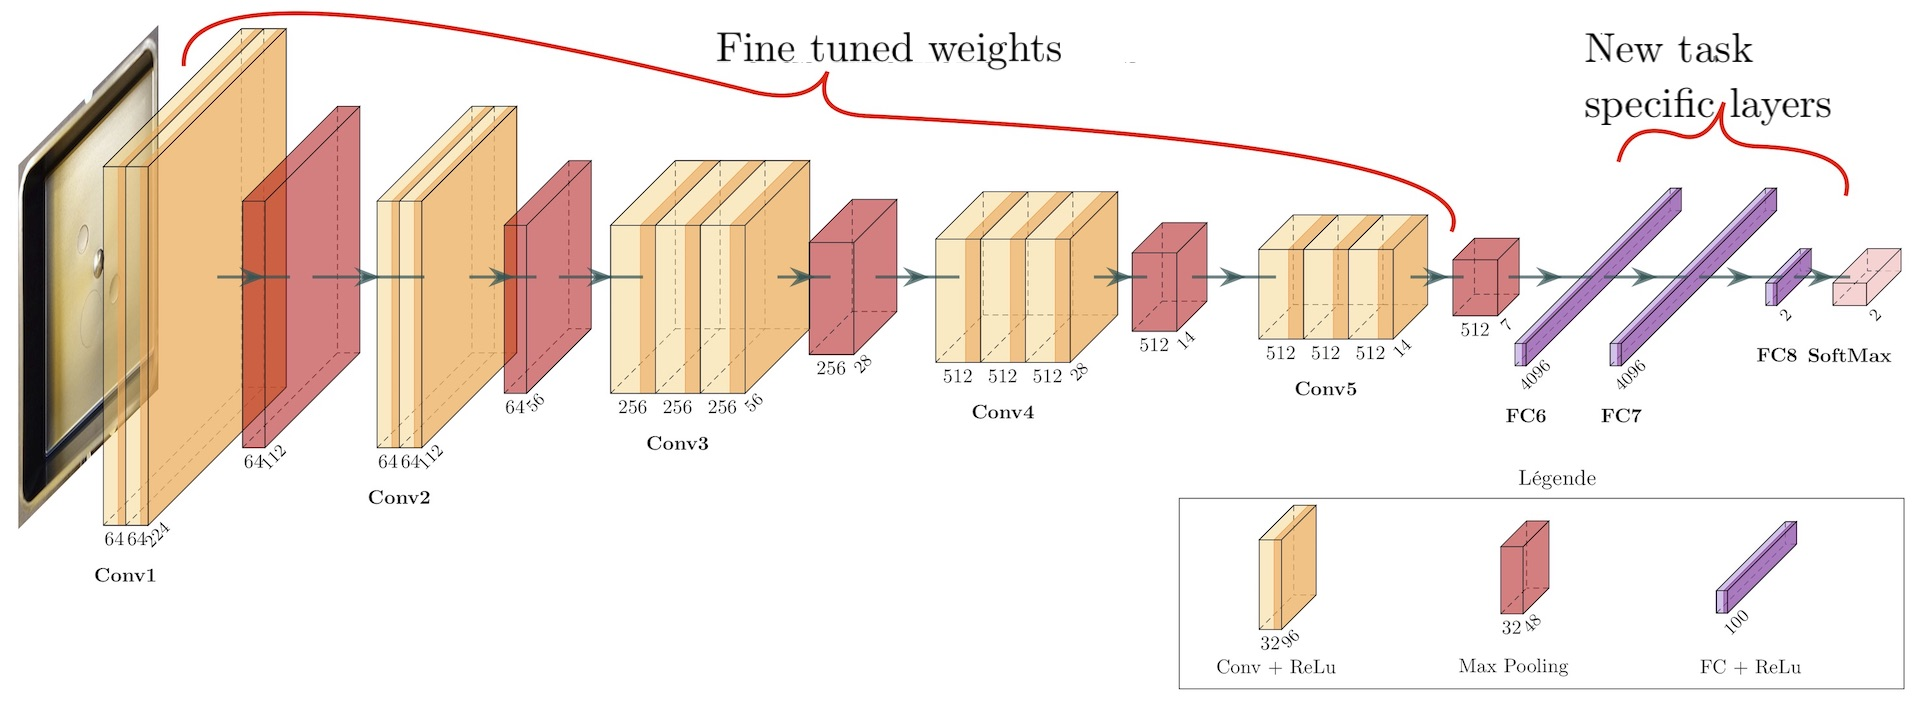

In [ ]:

#add our layers on top of this model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')

In [ ]:
model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [ ]:
#fitting the model for training dataset

In [ ]:
model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 33s 284ms/step - accuracy: 0.4284 - loss: 2.8177 - val_accuracy: 0.5973 - val_loss: 1.2124
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 154ms/step - accuracy: 0.7370 - loss: 0.7611 - val_accuracy: 0.7179 - val_loss: 0.9648
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.8444 - loss: 0.4446 - val_accuracy: 0.7179 - val_loss: 0.8999
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.9237 - loss: 0.2513 - val_accuracy: 0.7237 - val_loss: 1.0069
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.9289 - loss: 0.2199 - val_accuracy: 0.7198 - val_loss: 1.0238
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.9586 - loss: 0.1275 - val_accuracy: 0.7432 - val_loss: 1.0786
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.9753 - loss: 0.1304 - val_accuracy: 0.7412 - val_loss: 1.0018
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.9832 - loss: 0.0639 - val_accurac

# **training accuracy will be 98% val_accuracy will be 71%**

# **Building VGG16 model from Scratch by own**

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Rescaling
import tensorflow_datasets as tfds

# Load the tf_flowers dataset
(raw_train, raw_val), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],  # 80% for training, 20% for validation
    as_supervised=True,  # Returns (image, label) pairs
    with_info=True
)

# Data Preprocessing
def preprocess_image(image, label):
    # Resize image to (150, 150) and normalize pixel values to [0, 1]
    image = tf.image.resize(image, [150, 150])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = raw_train.map(preprocess_image).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = raw_val.map(preprocess_image).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Model Definition
full_model = Sequential([
    layers.Conv2D(16, kernel_size=10, activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(3),
    layers.Conv2D(32, kernel_size=8, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, kernel_size=6, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes in tf_flowers
])

# Compile the Model
full_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
    metrics=['accuracy']
)

# Early Stopping Callback
es = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=5,
    restore_best_weights=True
)

# Train the Model
history = full_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[es]
)

# Evaluate the Model
loss, accuracy = full_model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.2721 - loss: 1.5685 - val_accuracy: 0.3883 - val_loss: 1.4856
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4563 - loss: 1.3111 - val_accuracy: 0.4918 - val_loss: 1.2319
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5006 - loss: 1.1959 - val_accuracy: 0.5068 - val_loss: 1.1553
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5375 - loss: 1.1366 - val_accuracy: 0.5531 - val_loss: 1.1041
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5672 - loss: 1.0899 - val_accuracy: 0.5504 - val_loss: 1.1559
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5891 - loss: 1.0277 - val_accuracy: 0.5736 - val_loss: 1.0644
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6228 - loss: 0.9727 - val_accuracy: 0.5736 - val_loss: 1.0496
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6550 - loss: 0.8762 - val_accuracy: 0.5708 -

inbuild vgg16 model contains **98%** training accuracy compared to building model of vgg16 contains **60%** accuracy